# Machine Failure Prediction
### Machine Learning: Binary Classification
### Santiago Ospina Ferreira

Mission 1: Predict machine failure. 

Mission 2: Recall Optimization for unbalanced datasets.

Mission 3: Practicing full Machine Learning pipeline.

---------------------------------------------------------------------------------------------


Through this notebook, I will be developing binary classification prediction.

I will be using XGBoost and comparing it to various algorithms to check performance.



### Importing Libraries

In [1]:
!pip install --upgrade pip

In [2]:
%pip install -U imbalanced-learn
%pip install scikit-learn
%pip install statsmodels
%pip install sweetviz
%pip install xgboost 
%pip install fitter
%pip install imblearn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Functions

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import sweetviz as sv
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats

In [4]:
def plot_histogram(df, column_name):

    plt.hist(df[column_name], bins=100)
    plt.title(column_name)
    plt.show()

def check_distributions(df, column_name):

       f = Fitter(df[column_name],
       distributions=get_common_distributions())

       f.fit()
       f.summary(plot=True)

       print(f"\nBest sumsquare_error: {f.get_best(method='sumsquare_error')}")
       print(f"Best ks_pvalue: {f.get_best(method='ks_pvalue')}")
       print(f"Best ks_statistic: {f.get_best(method='ks_statistic')}")
       print(f"Best aic: {f.get_best(method='aic')}")


def get_distribution(df, column): # Using Kolmogorov Smirnov test
    
    values = df[column].values

    eval_method = 'ks_statistic'

    f = Fitter(values,
               distributions=get_common_distributions())
    f.fit()
    fit_results = f.get_best(method=eval_method)
    
    if next(iter(fit_results)) == 'norm':
        distribution = 'Normal'
        distribution_params = {}
        distribution_params['mean'] = fit_results['norm']['loc']
        distribution_params['std'] = fit_results['norm']['scale']   
        
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"Mean: {distribution_params['mean']}")
        print(f"std: {distribution_params['std']}")
        
        return distribution, distribution_params

    if next(iter(fit_results)) == 'Normal':
        distribution = 'Normal'
        distribution_params = {}
        distribution_params['mean'] = fit_results['norm']['loc']
        distribution_params['std'] = fit_results['norm']['scale']   
        
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"Mean: {distribution_params['mean']}")
        print(f"std: {distribution_params['std']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'gamma':
        distribution = 'Gamma'
        distribution_params = {}
        distribution_params['a'] = fit_results['gamma']['a']
        distribution_params['loc'] = fit_results['gamma']['loc']
        distribution_params['scale'] = fit_results['gamma']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"a: {distribution_params['a']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'rayleigh':
        
        distribution = 'Rayleigh'
        distribution_params = {}
        distribution_params['loc'] = fit_results['rayleigh']['loc']
        distribution_params['scale'] = fit_results['rayleigh']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'cauchy':
        
        distribution = 'Cauchy'
        distribution_params = {}
        distribution_params['loc'] = fit_results['cauchy']['loc']
        distribution_params['scale'] = fit_results['cauchy']['scale']
        
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'chi2':
        
        distribution = 'Chi2'
        distribution_params = {}
        distribution_params['df'] = fit_results['chi2']['df']
        distribution_params['loc'] = fit_results['chi2']['loc']
        distribution_params['scale'] = fit_results['chi2']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"df: {distribution_params['df']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'exponpow':
        
        distribution = 'Exponential Power'
        distribution_params = {}
        distribution_params['b'] = fit_results['exponpow']['b']
        distribution_params['loc'] = fit_results['exponpow']['loc']
        distribution_params['scale'] = fit_results['exponpow']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"b: {distribution_params['b']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'powerlaw':
        
        distribution = 'Powerlaw'
        distribution_params = {}
        distribution_params['a'] = fit_results['powerlaw']['a']
        distribution_params['loc'] = fit_results['powerlaw']['loc']
        distribution_params['scale'] = fit_results['powerlaw']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"a: {distribution_params['a']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'expon':
        
        distribution = 'Exponential'
        distribution_params = {}
        distribution_params['loc'] = fit_results['expon']['loc']
        distribution_params['scale'] = fit_results['expon']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'lognorm':
        
        distribution = 'Log-Normal'
        distribution_params = {}
        distribution_params['s'] = fit_results['lognorm']['s']
        distribution_params['loc'] = fit_results['lognorm']['loc']
        distribution_params['scale'] = fit_results['lognorm']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"s: {distribution_params['s']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    else: 
        print(f"{column} results ")
        print(fit_results)

def johnson_transformation(data):

    data = data.values

    # Ajustar la distribución de Johnson
    params = stats.johnsonsu.fit(data)

    # Crear la distribución de Johnson con los parámetros ajustados
    transformed_dist = stats.johnsonsu(*params)

    transformed_data = transformed_dist.rvs(size=len(data))

    # Plot de los datos originales y transformados
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.hist(data, bins=50, color='midnightblue', alpha=0.7)
    plt.title('Original Data')

    plt.subplot(2, 1, 2)
    plt.hist(transformed_data, bins=50, color='dodgerblue', alpha=0.7)
    plt.title('Transformed Data')

    plt.tight_layout()
    plt.show()

    return transformed_data


In [5]:
def dataCollection():
    
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')

    train_data.set_index('id', inplace=True)
    test_data.set_index('id', inplace=True)

    train_data['Product ID'] = train_data['Product ID'].astype('category')
    train_data['Type'] = train_data['Type'].astype('category')

    test_data['Product ID'] = test_data['Product ID'].astype('category')
    test_data['Type'] = test_data['Type'].astype('category')

    train_data.rename(columns={"Air temperature [K]": "Air temperature", 
                            "Process temperature [K]": "Process temperature",
                            "Rotational speed [rpm]": "Rotational speed",
                            "Torque [Nm]": "Torque",
                            "Tool wear [min]": "Tool wear"}, inplace=True)

    test_data.rename(columns={"Air temperature [K]": "Air temperature",
                                "Process temperature [K]": "Process temperature",
                                "Rotational speed [rpm]": "Rotational speed",
                                "Torque [Nm]": "Torque",
                                "Tool wear [min]": "Tool wear"}, inplace=True)

    y_train = train_data['Machine failure']

    features = train_data.columns.drop(['Machine failure']) # drop the target 
    features = features.drop(['Air temperature']) # high correlation with process temperature

    X_train = train_data[list(features)]

    X = X_train
    y = y_train

In [6]:
def print_metrics(y_test, y_pred, y_pred_binary):
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def metrics_vs_threshold_plot(y_test, y_pred, title):

    thresholds = np.linspace(0, 1, 101)  # Vary the threshold from 0 to 1 with 101 steps

    accuracy_scores = []
    roc_auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        
        accuracy = accuracy_score(y_test, y_pred_binary)
        roc_auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred_binary)
        recall = recall_score(y_test, y_pred_binary)
        f1 = f1_score(y_test, y_pred_binary)
        
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Plotting the metrics as the threshold varies
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy_scores, label='Accuracy')
    plt.plot(thresholds, roc_auc_scores, label='ROC AUC')
    plt.plot(thresholds, precision_scores, label='Precision')
    plt.plot(thresholds, recall_scores, label='Recall')
    plt.plot(thresholds, f1_scores, label='F1 Score')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metrics vs Threshold: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

def interactive_metrics_vs_threshold_plot(y_test, y_pred, title):
    thresholds = np.linspace(0, 1, 101)  # Vary the threshold from 0 to 1 with 101 steps

    accuracy_scores = []
    roc_auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        
        accuracy = accuracy_score(y_test, y_pred_binary)
        roc_auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred_binary)
        recall = recall_score(y_test, y_pred_binary)
        f1 = f1_score(y_test, y_pred_binary)
        
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Create a DataFrame to store the data
    data = pd.DataFrame({
        'Threshold': thresholds,
        'Accuracy': accuracy_scores,
        'ROC AUC': roc_auc_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1 Score': f1_scores
    })

    # Create an interactive line plot using Plotly Express
    fig = px.line(data, x='Threshold', y=['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score'],
                  title=f'Metrics vs Threshold: {title}',
                  labels={'value': 'Score'},
                  template='plotly_dark')

    # Move the legend to the top-right corner
    fig.update_layout(legend=dict(x=1, y=1), showlegend=True)

    # Add gridlines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

    # Show the plot
    fig.show()

## Raw XGBoost 

For benchmarking and comparison purposes.

In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
report = sv.compare([train_data, 'Train'], [test_data, 'Test'])

                                             |          | [  0%]   00:00 -> (? left)

In [9]:
report.show_html('report.html')

# report.show_html('path/to/save/report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
train_data.set_index('id', inplace=True)
test_data.set_index('id', inplace=True)

In [11]:
train_data['Product ID'] = train_data['Product ID'].astype('category')
train_data['Type'] = train_data['Type'].astype('category')

test_data['Product ID'] = test_data['Product ID'].astype('category')
test_data['Type'] = test_data['Type'].astype('category')

train_data.rename(columns={"Air temperature [K]": "Air temperature", 
                           "Process temperature [K]": "Process temperature",
                           "Rotational speed [rpm]": "Rotational speed",
                           "Torque [Nm]": "Torque",
                           "Tool wear [min]": "Tool wear"}, inplace=True)

test_data.rename(columns={"Air temperature [K]": "Air temperature",
                            "Process temperature [K]": "Process temperature",
                            "Rotational speed [rpm]": "Rotational speed",
                            "Torque [Nm]": "Torque",
                            "Tool wear [min]": "Tool wear"}, inplace=True)


In [12]:
train_data.dtypes

Product ID             category
Type                   category
Air temperature         float64
Process temperature     float64
Rotational speed          int64
Torque                  float64
Tool wear                 int64
Machine failure           int64
TWF                       int64
HDF                       int64
PWF                       int64
OSF                       int64
RNF                       int64
dtype: object

In [13]:
y_train = train_data['Machine failure']

features = train_data.columns.drop(['Machine failure']) # drop the target 
features = features.drop(['Air temperature']) # high correlation with process temperature

In [14]:
X_train = train_data[list(features)]

In [15]:
X = X_train
y = y_train

In [16]:
X.dtypes

Product ID             category
Type                   category
Process temperature     float64
Rotational speed          int64
Torque                  float64
Tool wear                 int64
TWF                       int64
HDF                       int64
PWF                       int64
OSF                       int64
RNF                       int64
dtype: object

In [17]:
# Train-Test  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)
# mirar que mas se puede ajustar

dtrain_clf = xgb.DMatrix(X_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

params = {"objective": "binary:logistic"} 

n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

In [18]:
print(results)

     train-logloss-mean  train-logloss-std  train-auc-mean  train-auc-std  \
0              0.441301           0.000117        0.890285   2.354074e-03   
1              0.302407           0.000188        0.898274   1.017078e-02   
2              0.215194           0.000243        0.901243   8.839287e-03   
3              0.157146           0.000292        0.903389   7.396069e-03   
4              0.117249           0.000333        0.911459   1.496417e-02   
..                  ...                ...             ...            ...   
995            0.000858           0.000033        0.999998   3.618416e-07   
996            0.000858           0.000033        0.999998   3.618416e-07   
997            0.000857           0.000033        0.999998   3.618416e-07   
998            0.000856           0.000033        0.999998   3.618416e-07   
999            0.000856           0.000033        0.999998   3.618416e-07   

     train-error-mean  train-error-std  test-logloss-mean  test-logloss-std

In [19]:
best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 51


In [20]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.44133
[1]	test-logloss:0.30247
[2]	test-logloss:0.21529
[3]	test-logloss:0.15727
[4]	test-logloss:0.11738
[5]	test-logloss:0.08946
[6]	test-logloss:0.06970
[7]	test-logloss:0.05561
[8]	test-logloss:0.04551
[9]	test-logloss:0.03825
[10]	test-logloss:0.03300
[11]	test-logloss:0.02929
[12]	test-logloss:0.02672
[13]	test-logloss:0.02492
[14]	test-logloss:0.02368
[15]	test-logloss:0.02277
[16]	test-logloss:0.02217
[17]	test-logloss:0.02171
[18]	test-logloss:0.02140
[19]	test-logloss:0.02119
[20]	test-logloss:0.02099
[21]	test-logloss:0.02094
[22]	test-logloss:0.02096
[23]	test-logloss:0.02092
[24]	test-logloss:0.02088
[25]	test-logloss:0.02086
[26]	test-logloss:0.02083
[27]	test-logloss:0.02083
[28]	test-logloss:0.02078
[29]	test-logloss:0.02074
[30]	test-logloss:0.02069
[31]	test-logloss:0.02075
[32]	test-logloss:0.02079
[33]	test-logloss:0.02074
[34]	test-logloss:0.02079
[35]	test-logloss:0.02079
[36]	test-logloss:0.02078
[37]	test-logloss:0.02077
[38]	test-logloss:0.02

In [21]:
dtest_final = xgb.DMatrix(X_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)

y_pred_binary = (y_pred > 0.5).astype(int) 

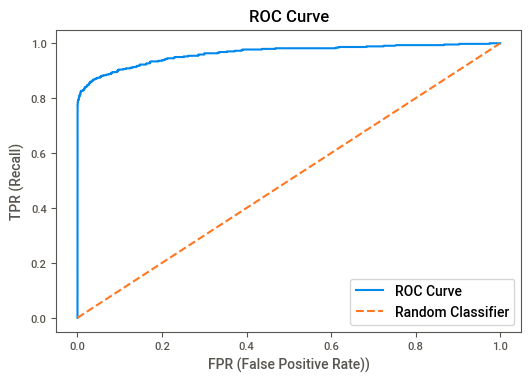

In [22]:
# plot AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], label="Random Classifier", linestyle="--")
plt.xlabel("FPR (False Positive Rate))")
plt.ylabel("TPR (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
print("Final Raw XGBoost Results\n")

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print_metrics(y_test, y_pred, y_pred_binary)

Final Raw XGBoost Results

Accuracy: 0.9962
ROC AUC: 0.9637
Precision: 0.9854
Recall: 0.7717
F1 Score: 0.8656


In [24]:
# están dando diferente los dos de feature importance, deben tomar en cuenta diferentes cosas

In [25]:
importance = final_model.get_score(importance_type="gain")
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (gain):")
for feature, importance_score in sorted_importance:
    print(f"{feature}: {importance_score:.4f}")

Feature Importance (gain):
HDF: 243.3073
OSF: 141.6944
PWF: 77.4750
TWF: 52.5390
Rotational speed: 6.1264
Torque: 5.9332
Tool wear: 4.8143
Product ID: 4.4935
Process temperature: 2.5463


In [26]:
importance = final_model.get_score(importance_type="weight")
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (weight):")
for feature, importance_score in sorted_importance:
    print(f"{feature}: {importance_score:.4f}")

Feature Importance (weight):
Torque: 215.0000
Rotational speed: 175.0000
Tool wear: 170.0000
Product ID: 152.0000
Process temperature: 134.0000
TWF: 29.0000
OSF: 29.0000
PWF: 28.0000
HDF: 23.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

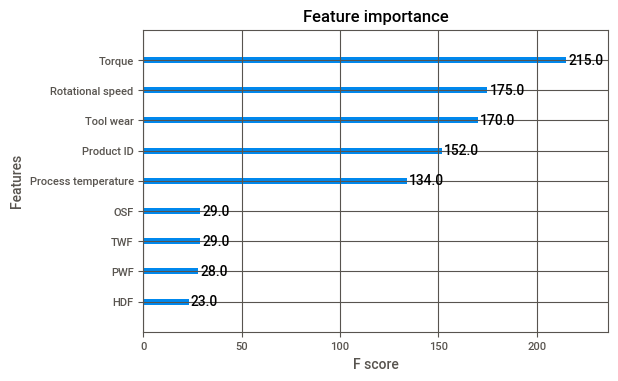

In [27]:
#plot feature importance
xgb.plot_importance(final_model) # usa la metrica de peso

In [28]:
dtest_final = xgb.DMatrix(X_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)

threshold = 0.3

y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Final Model Evaluation\n")

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Final Model Evaluation

Accuracy: 0.9960
ROC AUC: 0.9637
Precision: 0.9633
Recall: 0.7785
F1 Score: 0.8611


In [29]:
resultList = []

results = { "Model": "Raw",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


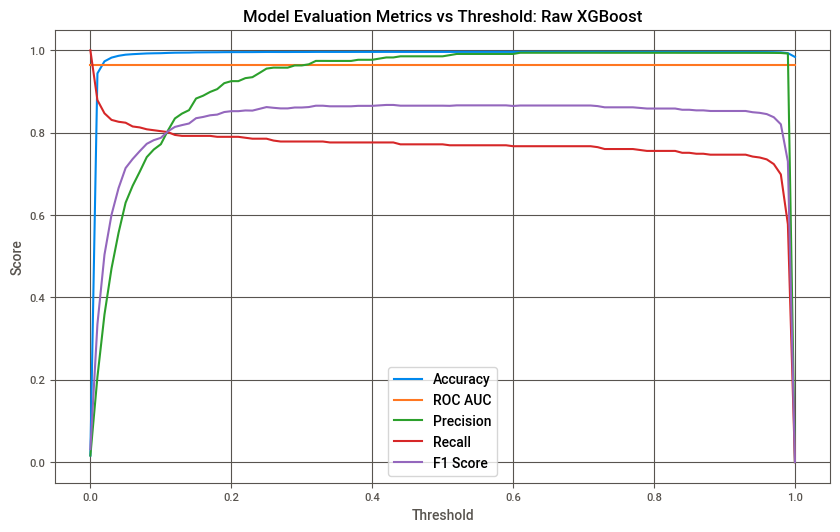

In [30]:
metrics_vs_threshold_plot(y_test, y_pred, "Raw XGBoost")

In [31]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "Raw XGBoost")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Preprocessed XGBoosts

Following methodologies and iterating for comparison with raw XGBoost

### Feature Engineering

#### Functions

In [32]:
def plot_histogram(df, column_name):

    plt.hist(df[column_name], bins=100)
    plt.title(column_name)
    plt.show()

In [33]:
def check_distributions(df, column_name):

       f = Fitter(df[column_name],
       distributions=get_common_distributions())

       f.fit()
       f.summary(plot=True)

       print(f"\nBest sumsquare_error: {f.get_best(method='sumsquare_error')}")
       print(f"Best ks_pvalue: {f.get_best(method='ks_pvalue')}")
       print(f"Best ks_statistic: {f.get_best(method='ks_statistic')}")
       print(f"Best aic: {f.get_best(method='aic')}")

In [34]:
def get_distribution(df, column): # Using Kolmogorov Smirnov test
    
    values = df[column].values

    eval_method = 'ks_statistic'

    f = Fitter(values,
               distributions=get_common_distributions())
    f.fit()
    fit_results = f.get_best(method=eval_method)
    
    if next(iter(fit_results)) == 'norm':
        distribution = 'Normal'
        distribution_params = {}
        distribution_params['mean'] = fit_results['norm']['loc']
        distribution_params['std'] = fit_results['norm']['scale']   
        
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"Mean: {distribution_params['mean']}")
        print(f"std: {distribution_params['std']}")
        
        return distribution, distribution_params

    if next(iter(fit_results)) == 'Normal':
        distribution = 'Normal'
        distribution_params = {}
        distribution_params['mean'] = fit_results['norm']['loc']
        distribution_params['std'] = fit_results['norm']['scale']   
        
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"Mean: {distribution_params['mean']}")
        print(f"std: {distribution_params['std']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'gamma':
        distribution = 'Gamma'
        distribution_params = {}
        distribution_params['a'] = fit_results['gamma']['a']
        distribution_params['loc'] = fit_results['gamma']['loc']
        distribution_params['scale'] = fit_results['gamma']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"a: {distribution_params['a']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'rayleigh':
        
        distribution = 'Rayleigh'
        distribution_params = {}
        distribution_params['loc'] = fit_results['rayleigh']['loc']
        distribution_params['scale'] = fit_results['rayleigh']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'cauchy':
        
        distribution = 'Cauchy'
        distribution_params = {}
        distribution_params['loc'] = fit_results['cauchy']['loc']
        distribution_params['scale'] = fit_results['cauchy']['scale']
        
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'chi2':
        
        distribution = 'Chi2'
        distribution_params = {}
        distribution_params['df'] = fit_results['chi2']['df']
        distribution_params['loc'] = fit_results['chi2']['loc']
        distribution_params['scale'] = fit_results['chi2']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"df: {distribution_params['df']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'exponpow':
        
        distribution = 'Exponential Power'
        distribution_params = {}
        distribution_params['b'] = fit_results['exponpow']['b']
        distribution_params['loc'] = fit_results['exponpow']['loc']
        distribution_params['scale'] = fit_results['exponpow']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"b: {distribution_params['b']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
        
    elif next(iter(fit_results)) == 'powerlaw':
        
        distribution = 'Powerlaw'
        distribution_params = {}
        distribution_params['a'] = fit_results['powerlaw']['a']
        distribution_params['loc'] = fit_results['powerlaw']['loc']
        distribution_params['scale'] = fit_results['powerlaw']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"a: {distribution_params['a']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'expon':
        
        distribution = 'Exponential'
        distribution_params = {}
        distribution_params['loc'] = fit_results['expon']['loc']
        distribution_params['scale'] = fit_results['expon']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    elif next(iter(fit_results)) == 'lognorm':
        
        distribution = 'Log-Normal'
        distribution_params = {}
        distribution_params['s'] = fit_results['lognorm']['s']
        distribution_params['loc'] = fit_results['lognorm']['loc']
        distribution_params['scale'] = fit_results['lognorm']['scale']
         
        print(f"\/\/ {column} results \/\/")
        print(f"Distribution: {distribution}")
        print(f"s: {distribution_params['s']}")
        print(f"loc: {distribution_params['loc']}")
        print(f"scale: {distribution_params['scale']}")
        
        return distribution, distribution_params
    
    else: 
        print(f"{column} results ")
        print(fit_results)

In [35]:
def qqPlot(df, column):
    sm.qqplot(df[column], line='s')

    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'{column} QQ Plot')

    plt.show()

In [36]:
def johnson_transformation(data):

    data = data.values

    # Ajustar la distribución de Johnson
    params = stats.johnsonsu.fit(data)

    # Crear la distribución de Johnson con los parámetros ajustados
    transformed_dist = stats.johnsonsu(*params)

    transformed_data = transformed_dist.rvs(size=len(data))

    # Plot de los datos originales y transformados
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.hist(data, bins=50, color='midnightblue', alpha=0.7)
    plt.title('Original Data')

    plt.subplot(2, 1, 2)
    plt.hist(transformed_data, bins=50, color='dodgerblue', alpha=0.7)
    plt.title('Transformed Data')

    plt.tight_layout()
    plt.show()

    return transformed_data

In [37]:
def metrics_vs_threshold_plot(y_test, y_pred, title):

    thresholds = np.linspace(0, 1, 101)  # Vary the threshold from 0 to 1 with 101 steps

    accuracy_scores = []
    roc_auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        
        accuracy = accuracy_score(y_test, y_pred_binary)
        roc_auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred_binary)
        recall = recall_score(y_test, y_pred_binary)
        f1 = f1_score(y_test, y_pred_binary)
        
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Plotting the metrics as the threshold varies
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy_scores, label='Accuracy')
    plt.plot(thresholds, roc_auc_scores, label='ROC AUC')
    plt.plot(thresholds, precision_scores, label='Precision')
    plt.plot(thresholds, recall_scores, label='Recall')
    plt.plot(thresholds, f1_scores, label='F1 Score')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metrics vs Threshold: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
def interactive_metrics_vs_threshold_plot(y_test, y_pred, title):
    thresholds = np.linspace(0, 1, 101)  # Vary the threshold from 0 to 1 with 101 steps

    accuracy_scores = []
    roc_auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        
        accuracy = accuracy_score(y_test, y_pred_binary)
        roc_auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred_binary)
        recall = recall_score(y_test, y_pred_binary)
        f1 = f1_score(y_test, y_pred_binary)
        
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Create a DataFrame to store the data
    data = pd.DataFrame({
        'Threshold': thresholds,
        'Accuracy': accuracy_scores,
        'ROC AUC': roc_auc_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1 Score': f1_scores
    })

    # Create an interactive line plot using Plotly Express
    fig = px.line(data, x='Threshold', y=['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score'],
                  title=f'Metrics vs Threshold: {title}',
                  labels={'value': 'Score'},
                  template='plotly_dark')

    # Move the legend to the top-right corner
    fig.update_layout(legend=dict(x=1, y=1), showlegend=True)

    # Add gridlines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

    # Show the plot
    fig.show()

In [39]:
def print_metrics(y_test, y_pred, y_pred_binary):
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

#### Data Collection

In [40]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.set_index('id', inplace=True)
test_data.set_index('id', inplace=True)

train_data['Product ID'] = train_data['Product ID'].astype('category')
train_data['Type'] = train_data['Type'].astype('category')

test_data['Product ID'] = test_data['Product ID'].astype('category')
test_data['Type'] = test_data['Type'].astype('category')

train_data.rename(columns={"Air temperature [K]": "Air temperature", 
                           "Process temperature [K]": "Process temperature",
                           "Rotational speed [rpm]": "Rotational speed",
                           "Torque [Nm]": "Torque",
                           "Tool wear [min]": "Tool wear"}, inplace=True)

test_data.rename(columns={"Air temperature [K]": "Air temperature",
                            "Process temperature [K]": "Process temperature",
                            "Rotational speed [rpm]": "Rotational speed",
                            "Torque [Nm]": "Torque",
                            "Tool wear [min]": "Tool wear"}, inplace=True)

y_train = train_data['Machine failure']

features = train_data.columns.drop(['Machine failure']) # drop the target 
features = features.drop(['Air temperature']) # high correlation with process temperature

X_train = train_data[list(features)]

X = X_train
y = y_train

In [41]:
def dataCollection():
    
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')

    train_data.set_index('id', inplace=True)
    test_data.set_index('id', inplace=True)

    train_data['Product ID'] = train_data['Product ID'].astype('category')
    train_data['Type'] = train_data['Type'].astype('category')

    test_data['Product ID'] = test_data['Product ID'].astype('category')
    test_data['Type'] = test_data['Type'].astype('category')

    train_data.rename(columns={"Air temperature [K]": "Air temperature", 
                            "Process temperature [K]": "Process temperature",
                            "Rotational speed [rpm]": "Rotational speed",
                            "Torque [Nm]": "Torque",
                            "Tool wear [min]": "Tool wear"}, inplace=True)

    test_data.rename(columns={"Air temperature [K]": "Air temperature",
                                "Process temperature [K]": "Process temperature",
                                "Rotational speed [rpm]": "Rotational speed",
                                "Torque [Nm]": "Torque",
                                "Tool wear [min]": "Tool wear"}, inplace=True)

    y_train = train_data['Machine failure']

    features = train_data.columns.drop(['Machine failure']) # drop the target 
    features = features.drop(['Air temperature']) # high correlation with process temperature

    X_train = train_data[list(features)]

    X = X_train
    y = y_train

#### Checking Distribution and Outliers

##### QQ Plots

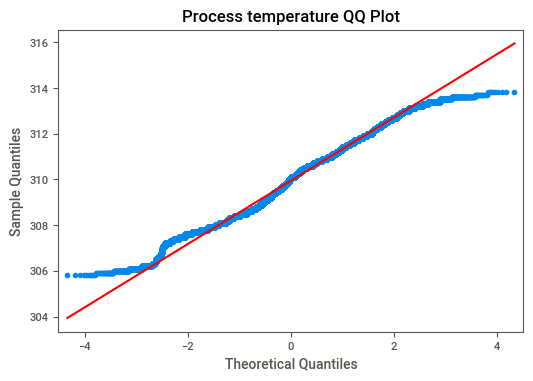

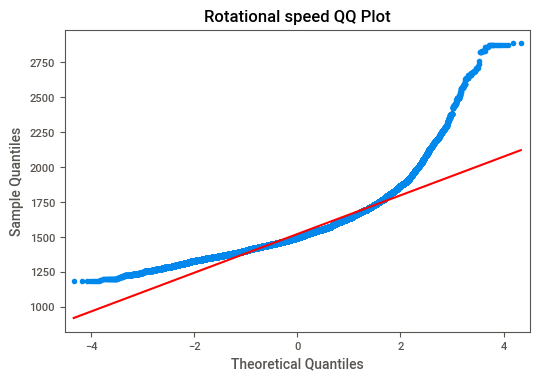

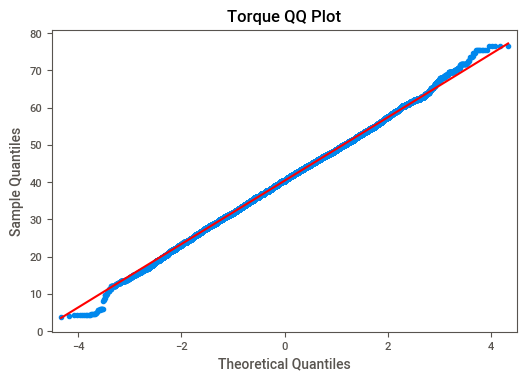

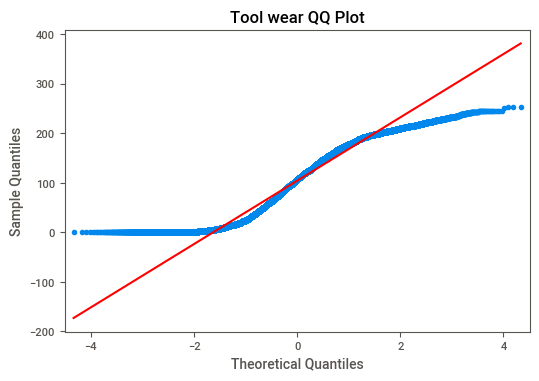

In [42]:
# these are the numerical columns that I wanna evaluate
qqColumns = ['Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

for column in qqColumns:
    qqPlot(X_train, column)

##### Distributions

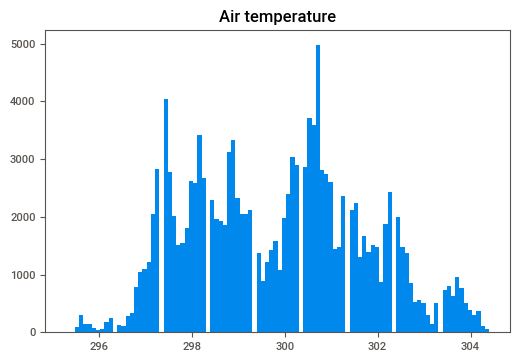

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


Best sumsquare_error: {'norm': {'loc': 299.8627757661494, 'scale': 1.8622402509979954}}
Best ks_pvalue: {'norm': {'loc': 299.8627757661494, 'scale': 1.8622402509979954}}
Best ks_statistic: {'norm': {'loc': 299.8627757661494, 'scale': 1.8622402509979954}}
Best aic: {'uniform': {'loc': 295.3, 'scale': 9.099999999999966}}


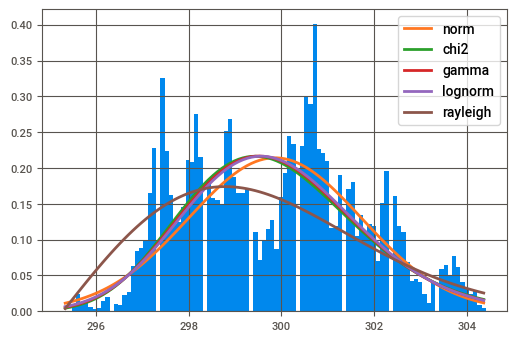

In [43]:
plot_histogram(train_data, "Air temperature")
check_distributions(train_data, "Air temperature")

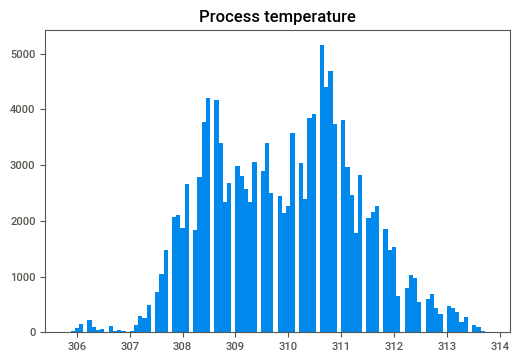

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]


Best sumsquare_error: {'exponpow': {'b': 2.3658653209040144, 'loc': 305.7941604709705, 'scale': 5.5811759846371505}}
Best ks_pvalue: {'expon': {'loc': 305.8, 'scale': 4.141070446899107}}
Best ks_statistic: {'exponpow': {'b': 2.3658653209040144, 'loc': 305.7941604709705, 'scale': 5.5811759846371505}}
Best aic: {'uniform': {'loc': 305.8, 'scale': 8.0}}


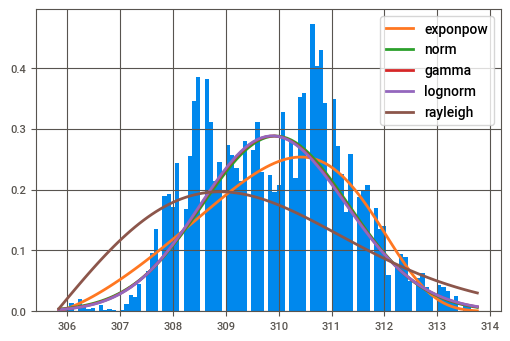

In [44]:
plot_histogram(train_data, "Process temperature")
check_distributions(train_data, "Process temperature")

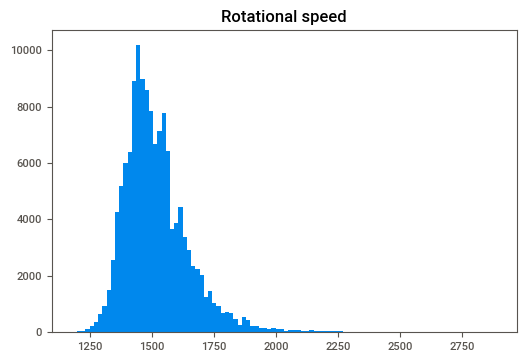

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


Best sumsquare_error: {'lognorm': {'s': 0.32970028997746315, 'loc': 1132.8808073647685, 'scale': 366.48392700406697}}
Best ks_pvalue: {'norm': {'loc': 1520.3311099546283, 'scale': 138.7361235068619}}
Best ks_statistic: {'lognorm': {'s': 0.32970028997746315, 'loc': 1132.8808073647685, 'scale': 366.48392700406697}}
Best aic: {'uniform': {'loc': 1181.0, 'scale': 1705.0}}


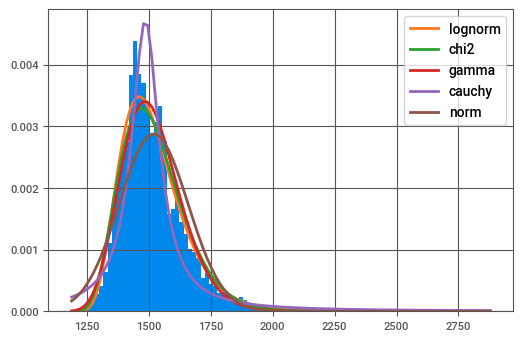

In [45]:
plot_histogram(train_data, "Rotational speed")
check_distributions(train_data, "Rotational speed")
# borraría outliers si tuviera mayor contexto de las máquinas, porque podrían ser máquinas especiales con alta velocidad rotacional

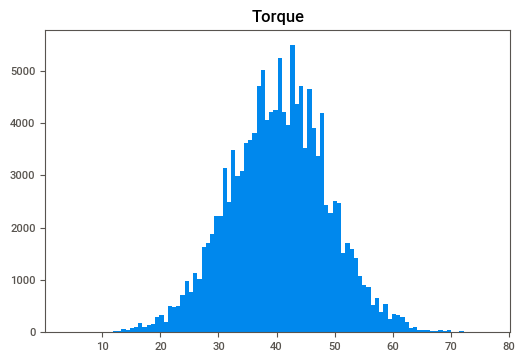

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]


Best sumsquare_error: {'norm': {'loc': 40.34864310373894, 'scale': 8.502197853304008}}
Best ks_pvalue: {'expon': {'loc': 3.8, 'scale': 36.54864310373894}}
Best ks_statistic: {'norm': {'loc': 40.34864310373894, 'scale': 8.502197853304008}}
Best aic: {'uniform': {'loc': 3.8, 'scale': 72.8}}


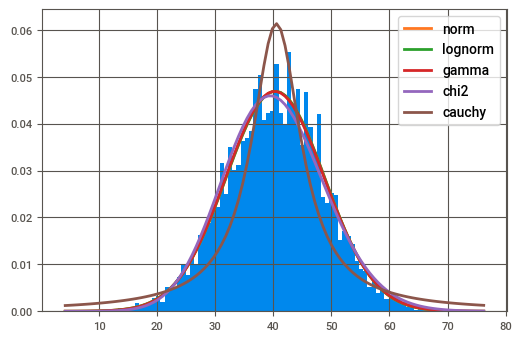

In [46]:
plot_histogram(train_data, "Torque")
check_distributions(train_data, "Torque")

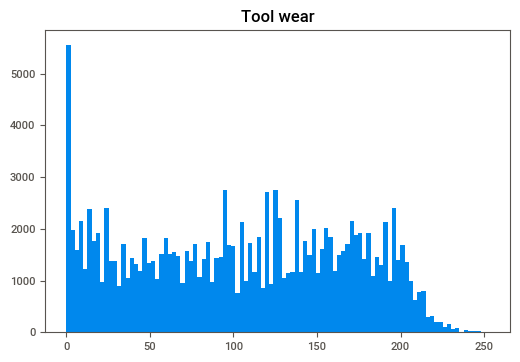

Fitting 10 distributions: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


Best sumsquare_error: {'uniform': {'loc': 0.0, 'scale': 253.0}}
Best ks_pvalue: {'norm': {'loc': 104.40890133329424, 'scale': 63.96480552855836}}
Best ks_statistic: {'gamma': {'a': 6027.383032713391, 'loc': -4863.44753764599, 'scale': 0.8242130283499822}}
Best aic: {'uniform': {'loc': 0.0, 'scale': 253.0}}


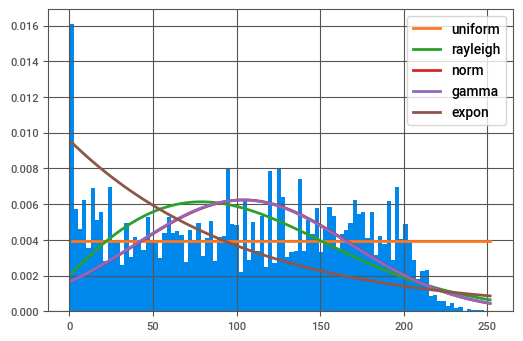

In [47]:
plot_histogram(train_data, "Tool wear")
check_distributions(train_data, "Tool wear")

### Oversampling | One Hot Encoding | NO L1 Regularization

In [48]:
X_train

,Product ID,Type,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,
0,L50096,L,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,311.4,1530,37.5,210,0,0,0,0,0
136425,H38017,H,308.5,1447,49.1,2,0,0,0,0,0
136426,L54690,L,311.8,1524,38.5,214,0,0,0,0,0


In [49]:
y_train

id
0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [50]:
y_train.value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [51]:
X_train.drop(columns=['Product ID'], inplace=True) 
X_train_encoded = pd.get_dummies(X_train, columns=['Type']).copy()

/var/folders/9b/ysn73g0n5jz78s5rx0jzwn6h0000gn/T/ipykernel_51639/2004295254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# Esto para mantener el formato entre X_train y X_test 
# Tendría que confirmar que sí sea legal en la vida real hacer esto

X_test.drop(columns=['Product ID'], inplace=True) 
X_test_encoded = pd.get_dummies(X_test, columns=['Type']).copy()

In [53]:
X_train_encoded

,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
id,,,,,,,,,,,,
0,309.6,1596,36.1,140,0,0,0,0,0,0,1,0
1,312.1,1759,29.1,200,0,0,0,0,0,0,0,1
2,308.5,1805,26.5,25,0,0,0,0,0,0,1,0
3,310.9,1524,44.3,197,0,0,0,0,0,0,1,0
4,309.0,1641,35.4,34,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,311.4,1530,37.5,210,0,0,0,0,0,0,0,1
136425,308.5,1447,49.1,2,0,0,0,0,0,1,0,0
136426,311.8,1524,38.5,214,0,0,0,0,0,0,1,0


In [54]:
X_train_array = X_train_encoded.to_numpy()
y_train_array = y_train.to_numpy()

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_train_array, y_train_array)

# Convert the resampled data back to a DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train_encoded.columns)
y_resampled_series = pd.Series(y_resampled, name='Machine failure')

In [55]:
# Check class distribution in the resampled dataset
y_resampled_series.value_counts()

0    134281
1    134281
Name: Machine failure, dtype: int64

In [56]:
# # XGBoost model 

# model = xgb.XGBClassifier(
#     objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
# )

# dtrain_clf = xgb.DMatrix(X_resampled_df, label=y_resampled_series, enable_categorical=True) #dtrain es para varios "formatos"
# dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

# params = {"objective": "binary:logistic"} 

# results = xgb.cv(
#    params, dtrain_clf,
#    num_boost_round=n,
#    nfold=5,
#    metrics=["logloss", "auc", "error"],
# )

# results

# best_round = results["test-logloss-mean"].idxmin()
# print("Best number of boosting rounds:", best_round)

# final_model = xgb.train(
#     params,
#     dtrain_clf,
#     num_boost_round=best_round,
#     evals=[(dtest_clf, "test")],
#     early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
# )

# dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

# y_pred = final_model.predict(dtest_final)

# y_pred_binary = (y_pred > 0.5).astype(int) 

# print_metrics(y_test, y_pred, y_pred_binary)

# metrics_vs_threshold_plot(y_test, y_pred)

In [57]:
# XGBoost model 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# dtrain es para varios "formatos"
dtrain_clf = xgb.DMatrix(X_resampled_df, label=y_resampled_series, enable_categorical=True)

# con X Test encoded y ID drop 
dtest_clf = xgb.DMatrix(X_test_encoded, label=y_test, enable_categorical=True) 

params = {"objective": "binary:logistic"} 

In [58]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

In [59]:
X_test_encoded

,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
id,,,,,,,,,,,,
123128,310.7,1368,62.0,12,0,0,0,1,0,0,1,0
54705,311.3,1543,36.0,190,0,0,0,0,0,0,1,0
40016,310.4,1499,38.5,114,0,0,0,0,0,0,1,0
75025,308.4,1502,38.5,130,0,0,0,0,0,0,1,0
120421,310.7,1539,38.5,203,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101443,309.0,1592,35.3,65,0,0,0,0,0,0,0,1
93071,309.2,1425,55.9,24,0,0,0,0,0,0,0,1
75849,310.5,1534,34.7,59,0,0,0,0,0,0,1,0


In [60]:
y_test

id
123128    1
54705     0
40016     0
75025     0
120421    0
         ..
101443    0
93071     0
75849     0
52610     0
31838     0
Name: Machine failure, Length: 27286, dtype: int64

In [61]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.473226,0.000206,0.966608,2.203659e-04,0.038505,0.000245,0.473260,0.000465,0.966585,0.000727,0.038576,0.000973
1,0.353179,0.000459,0.972646,2.770390e-03,0.039142,0.000282,0.353293,0.000787,0.972281,0.002503,0.039280,0.001308
2,0.279240,0.000410,0.974001,2.200098e-03,0.038850,0.000308,0.279348,0.001142,0.973780,0.002084,0.038915,0.001127
3,0.230989,0.000442,0.976936,1.595700e-04,0.039722,0.000442,0.231063,0.001428,0.976877,0.000647,0.039779,0.001110
4,0.187048,0.000451,0.984585,1.564064e-04,0.035394,0.000274,0.187128,0.001357,0.984437,0.000446,0.035418,0.001028
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.001016,0.000020,1.000000,1.834076e-08,0.000118,0.000005,0.012217,0.000600,0.999444,0.000062,0.002145,0.000143
996,0.001015,0.000021,1.000000,1.784358e-08,0.000118,0.000005,0.012219,0.000601,0.999444,0.000063,0.002145,0.000143
997,0.001013,0.000021,1.000000,1.808302e-08,0.000118,0.000005,0.012219,0.000600,0.999444,0.000063,0.002148,0.000144
998,0.001012,0.000020,1.000000,1.800764e-08,0.000118,0.000005,0.012220,0.000604,0.999445,0.000063,0.002152,0.000140


In [62]:
best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 348


In [63]:
X_resampled_df

,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,309.600000,1596.000000,36.100000,140.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000
1,312.100000,1759.000000,29.100000,200.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
2,308.500000,1805.000000,26.500000,25.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000
3,310.900000,1524.000000,44.300000,197.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000
4,309.000000,1641.000000,35.400000,34.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
268557,308.806540,1470.030121,39.679431,3.407056,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000
268558,310.502528,1328.389237,63.656646,163.610763,0.0,0.000000,1.0,0.000000,0.0,0.0,0.522153,0.477847
268559,310.310292,1347.931385,49.279923,161.171538,0.0,1.000000,0.0,0.000000,0.0,0.0,0.965692,0.034308
268560,312.664793,1355.492974,45.515496,197.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000


In [64]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.46972
[1]	test-logloss:0.34291
[2]	test-logloss:0.26223
[3]	test-logloss:0.20829
[4]	test-logloss:0.17121
[5]	test-logloss:0.14026
[6]	test-logloss:0.11978
[7]	test-logloss:0.10378
[8]	test-logloss:0.09452
[9]	test-logloss:0.08418
[10]	test-logloss:0.07834
[11]	test-logloss:0.07319
[12]	test-logloss:0.06858
[13]	test-logloss:0.06584
[14]	test-logloss:0.06304
[15]	test-logloss:0.06109
[16]	test-logloss:0.05892
[17]	test-logloss:0.05728
[18]	test-logloss:0.05601
[19]	test-logloss:0.05392
[20]	test-logloss:0.05283
[21]	test-logloss:0.05174
[22]	test-logloss:0.05016
[23]	test-logloss:0.04942
[24]	test-logloss:0.04856
[25]	test-logloss:0.04770
[26]	test-logloss:0.04709
[27]	test-logloss:0.04668
[28]	test-logloss:0.04642
[29]	test-logloss:0.04508
[30]	test-logloss:0.04428
[31]	test-logloss:0.04294
[32]	test-logloss:0.04180
[33]	test-logloss:0.04108
[34]	test-logloss:0.04043
[35]	test-logloss:0.04010
[36]	test-logloss:0.03954
[37]	test-logloss:0.03813
[38]	test-logloss:0.03

In [65]:
dtest_final = xgb.DMatrix(X_test_encoded, enable_categorical=True)

y_pred = final_model.predict(dtest_final)
y_pred_binary = (y_pred > 0.17).astype(int) 

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [66]:
print_metrics(y_test, y_pred, y_pred_binary)

Accuracy: 0.9985
ROC AUC: 0.9997
Precision: 0.9542
Recall: 0.9521
F1 Score: 0.9531


In [67]:
results = { "Model": "SMOTE OS",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



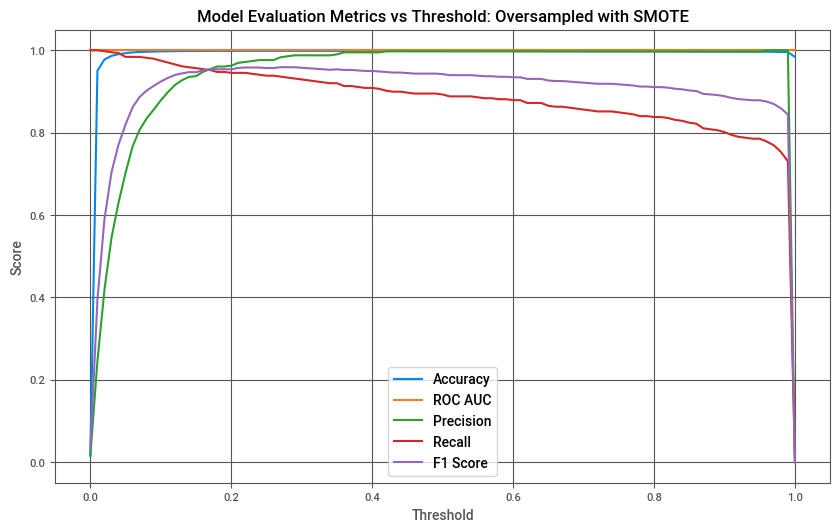

In [68]:
metrics_vs_threshold_plot(y_test, y_pred, "Oversampled with SMOTE")

In [69]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "Oversampled with SMOTE")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### L1 Regularizations | NO Distribution Transformations | Hot Encoding

In [191]:
dataCollection()

In [192]:
#X_train.drop(columns=['Product ID'], inplace=True) 
X_train_encoded = pd.get_dummies(X_train, columns=['Type']).copy()

##### L1 with alpha 0.01 

In [193]:
# Lasso object
alpha = 0.01
lasso = Lasso(alpha=alpha) 

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]

In [194]:
coef

array([ 0.        ,  0.00010244,  0.00329909,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ])

In [195]:
relevant_features

Index(['Rotational speed', 'Torque'], dtype='object')

In [75]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [76]:
newX_train = X_train[relevant_features].copy()
newX_test = X_test[relevant_features].copy()

In [77]:
newX_train

,Rotational speed,Torque,Tool wear
id,,,
0,1596,36.1,140
1,1759,29.1,200
2,1805,26.5,25
3,1524,44.3,197
4,1641,35.4,34
...,...,...,...
136424,1530,37.5,210
136425,1447,49.1,2
136426,1524,38.5,214


In [78]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [79]:
params = {"objective": "binary:logistic"} 

In [80]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 32


In [81]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.450142,0.000139,0.863383,0.004791,0.013778,0.000143,0.450491,0.000230,0.858780,0.004752,0.014733,0.000458
1,0.316322,0.000188,0.875857,0.004426,0.013644,0.000154,0.316979,0.000448,0.872938,0.004851,0.014520,0.000512
2,0.232652,0.000241,0.884401,0.003110,0.013595,0.000116,0.233604,0.000597,0.880273,0.009162,0.014557,0.000664
3,0.177258,0.000245,0.888040,0.002784,0.013481,0.000080,0.178509,0.000749,0.883736,0.009452,0.014550,0.000542
4,0.139381,0.000279,0.890749,0.004411,0.013412,0.000113,0.140928,0.000881,0.886035,0.010026,0.014550,0.000593
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.012198,0.000265,0.999581,0.000049,0.003698,0.000210,0.068105,0.001632,0.882703,0.007196,0.015796,0.000512
996,0.012190,0.000267,0.999582,0.000049,0.003694,0.000209,0.068119,0.001633,0.882686,0.007195,0.015788,0.000491
997,0.012186,0.000267,0.999583,0.000049,0.003689,0.000209,0.068123,0.001636,0.882712,0.007179,0.015788,0.000504
998,0.012181,0.000262,0.999583,0.000049,0.003689,0.000204,0.068129,0.001636,0.882706,0.007197,0.015803,0.000507


In [82]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45040
[1]	test-logloss:0.31678
[2]	test-logloss:0.23316
[3]	test-logloss:0.17778
[4]	test-logloss:0.13988
[5]	test-logloss:0.11345
[6]	test-logloss:0.09478
[7]	test-logloss:0.08153
[8]	test-logloss:0.07206
[9]	test-logloss:0.06515
[10]	test-logloss:0.06029
[11]	test-logloss:0.05676
[12]	test-logloss:0.05422
[13]	test-logloss:0.05238
[14]	test-logloss:0.05108
[15]	test-logloss:0.05004
[16]	test-logloss:0.04929
[17]	test-logloss:0.04874
[18]	test-logloss:0.04827
[19]	test-logloss:0.04788
[20]	test-logloss:0.04745
[21]	test-logloss:0.04723
[22]	test-logloss:0.04708
[23]	test-logloss:0.04685
[24]	test-logloss:0.04642
[25]	test-logloss:0.04618
[26]	test-logloss:0.04584
[27]	test-logloss:0.04565
[28]	test-logloss:0.04556
[29]	test-logloss:0.04531
[30]	test-logloss:0.04520
[31]	test-logloss:0.04508


In [83]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)

y_pred_binary = (y_pred > 0.06).astype(int) 

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [84]:
print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")
print_metrics(y_test, y_pred, y_pred_binary)

Final with alpha = 0.01 (3 features) 

Accuracy: 0.9482
ROC AUC: 0.9444
Precision: 0.1978
Recall: 0.7283
F1 Score: 0.3111


In [85]:
results = { "Model": "L1 a=0.01",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



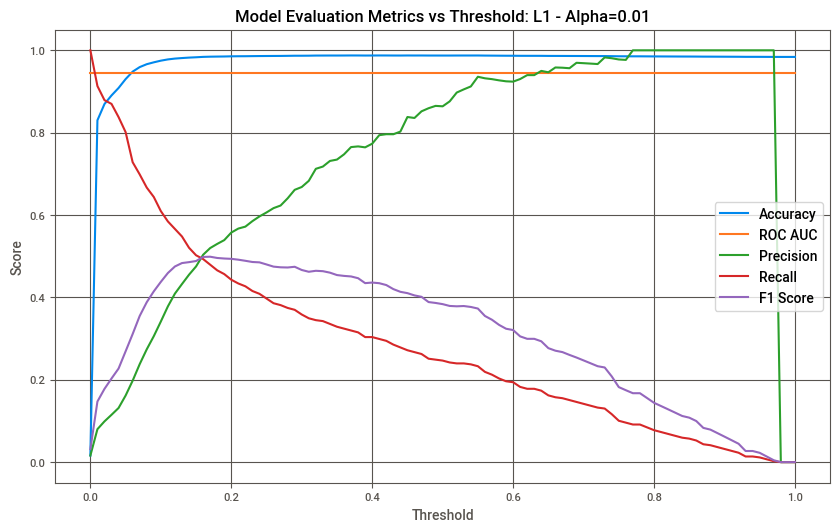

In [86]:
metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.01")

In [87]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.01")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



##### L1 with alpha 0.05

In [185]:
# Lasso object
alpha = 0.05
lasso = Lasso(alpha=alpha) # Expected Two features

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]

In [186]:
coef

array([ 0.00000000e+00,  2.98102018e-05,  1.82207890e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [187]:
relevant_features

Index(['Rotational speed', 'Torque'], dtype='object')

In [91]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [92]:
newX_train = X_train[relevant_features].copy()
newX_test = X_test[relevant_features].copy()

In [93]:
newX_train

,Rotational speed,Torque,Tool wear
id,,,
0,1596,36.1,140
1,1759,29.1,200
2,1805,26.5,25
3,1524,44.3,197
4,1641,35.4,34
...,...,...,...
136424,1530,37.5,210
136425,1447,49.1,2
136426,1524,38.5,214


In [94]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [95]:
params = {"objective": "binary:logistic"} 

In [96]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 32


In [97]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.450142,0.000139,0.863383,0.004791,0.013778,0.000143,0.450491,0.000230,0.858780,0.004752,0.014733,0.000458
1,0.316322,0.000188,0.875857,0.004426,0.013644,0.000154,0.316979,0.000448,0.872938,0.004851,0.014520,0.000512
2,0.232652,0.000241,0.884401,0.003110,0.013595,0.000116,0.233604,0.000597,0.880273,0.009162,0.014557,0.000664
3,0.177258,0.000245,0.888040,0.002784,0.013481,0.000080,0.178509,0.000749,0.883736,0.009452,0.014550,0.000542
4,0.139381,0.000279,0.890749,0.004411,0.013412,0.000113,0.140928,0.000881,0.886035,0.010026,0.014550,0.000593
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.012198,0.000265,0.999581,0.000049,0.003698,0.000210,0.068105,0.001632,0.882703,0.007196,0.015796,0.000512
996,0.012190,0.000267,0.999582,0.000049,0.003694,0.000209,0.068119,0.001633,0.882686,0.007195,0.015788,0.000491
997,0.012186,0.000267,0.999583,0.000049,0.003689,0.000209,0.068123,0.001636,0.882712,0.007179,0.015788,0.000504
998,0.012181,0.000262,0.999583,0.000049,0.003689,0.000204,0.068129,0.001636,0.882706,0.007197,0.015803,0.000507


In [98]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45040


[1]	test-logloss:0.31678
[2]	test-logloss:0.23316
[3]	test-logloss:0.17778
[4]	test-logloss:0.13988
[5]	test-logloss:0.11345
[6]	test-logloss:0.09478
[7]	test-logloss:0.08153
[8]	test-logloss:0.07206
[9]	test-logloss:0.06515
[10]	test-logloss:0.06029
[11]	test-logloss:0.05676
[12]	test-logloss:0.05422
[13]	test-logloss:0.05238
[14]	test-logloss:0.05108
[15]	test-logloss:0.05004
[16]	test-logloss:0.04929
[17]	test-logloss:0.04874
[18]	test-logloss:0.04827
[19]	test-logloss:0.04788
[20]	test-logloss:0.04745
[21]	test-logloss:0.04723
[22]	test-logloss:0.04708
[23]	test-logloss:0.04685
[24]	test-logloss:0.04642
[25]	test-logloss:0.04618
[26]	test-logloss:0.04584
[27]	test-logloss:0.04565
[28]	test-logloss:0.04556
[29]	test-logloss:0.04531
[30]	test-logloss:0.04520
[31]	test-logloss:0.04508


In [99]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)
y_pred_binary = (y_pred > 0.06).astype(int) 

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [100]:
print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")
print_metrics(y_test, y_pred, y_pred_binary)

Final with alpha = 0.05 (3 features) 



Accuracy: 0.9482
ROC AUC: 0.9444
Precision: 0.1978
Recall: 0.7283
F1 Score: 0.3111


In [101]:
results = { "Model": "L1 a=0.05",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



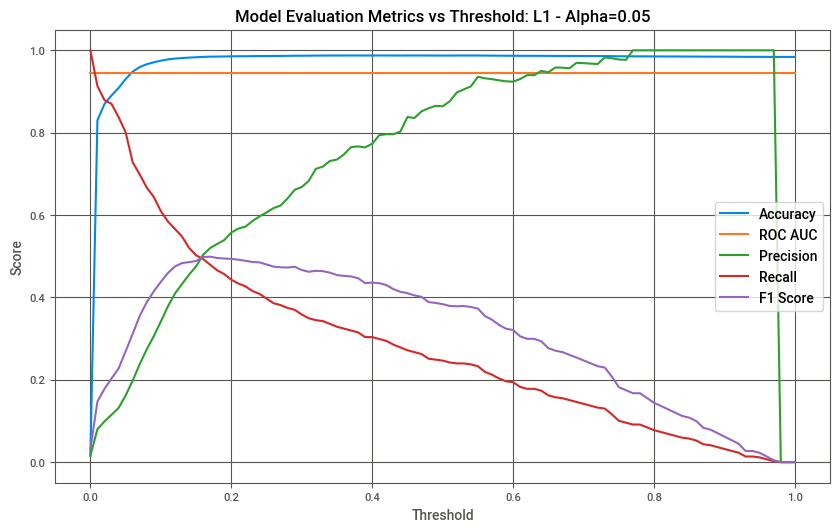

In [102]:
metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.05")

In [103]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.05")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



##### L1 with alpha 0.07

In [104]:
# Lasso object
alpha = 0.07
lasso = Lasso(alpha=alpha) # One feature

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]

In [105]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [106]:
newX_train = X_train[relevant_features].copy()
newX_test = X_test[relevant_features].copy()

In [107]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [108]:
params = {"objective": "binary:logistic"} 

In [109]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 33


In [110]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.450448,0.000119,0.837313,0.002923,0.013987,0.000169,0.450712,0.000290,0.833169,0.006492,0.014601,0.000404
1,0.316883,0.000172,0.862537,0.002283,0.013874,0.000064,0.317386,0.000491,0.858291,0.008833,0.014550,0.000602
2,0.233451,0.000213,0.868724,0.002092,0.013740,0.000088,0.234170,0.000627,0.863770,0.009910,0.014572,0.000592
3,0.178330,0.000249,0.872305,0.002669,0.013738,0.000118,0.179240,0.000753,0.867719,0.008112,0.014520,0.000542
4,0.140776,0.000267,0.874588,0.001066,0.013683,0.000131,0.141908,0.000879,0.869569,0.009234,0.014396,0.000492
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.030778,0.000187,0.987077,0.000363,0.010374,0.000075,0.068787,0.001036,0.844677,0.007162,0.015752,0.000230
996,0.030767,0.000189,0.987103,0.000362,0.010375,0.000077,0.068793,0.001038,0.844718,0.007204,0.015744,0.000232
997,0.030760,0.000192,0.987115,0.000366,0.010368,0.000081,0.068803,0.001041,0.844677,0.007231,0.015737,0.000230
998,0.030744,0.000188,0.987142,0.000354,0.010361,0.000079,0.068820,0.001028,0.844606,0.007217,0.015737,0.000230


In [111]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45048
[1]	test-logloss:0.31704


[2]	test-logloss:0.23358
[3]	test-logloss:0.17848
[4]	test-logloss:0.14092
[5]	test-logloss:0.11486
[6]	test-logloss:0.09667
[7]	test-logloss:0.08381
[8]	test-logloss:0.07475
[9]	test-logloss:0.06839
[10]	test-logloss:0.06385
[11]	test-logloss:0.06066
[12]	test-logloss:0.05836
[13]	test-logloss:0.05675
[14]	test-logloss:0.05563
[15]	test-logloss:0.05488
[16]	test-logloss:0.05422
[17]	test-logloss:0.05377
[18]	test-logloss:0.05343
[19]	test-logloss:0.05317
[20]	test-logloss:0.05287
[21]	test-logloss:0.05253
[22]	test-logloss:0.05235
[23]	test-logloss:0.05222
[24]	test-logloss:0.05211
[25]	test-logloss:0.05205
[26]	test-logloss:0.05185
[27]	test-logloss:0.05172
[28]	test-logloss:0.05145
[29]	test-logloss:0.05143
[30]	test-logloss:0.05140
[31]	test-logloss:0.05130
[32]	test-logloss:0.05127


In [112]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)
y_pred_binary = (y_pred > 0.06).astype(int) 

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [113]:
print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")
print_metrics(y_test, y_pred, y_pred_binary)

Final with alpha = 0.07 (2 features) 

Accuracy: 0.9599
ROC AUC: 0.9216
Precision: 0.2185
Recall: 0.5822
F1 Score: 0.3178


In [114]:
results = { "Model": "L1 a=0.07",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

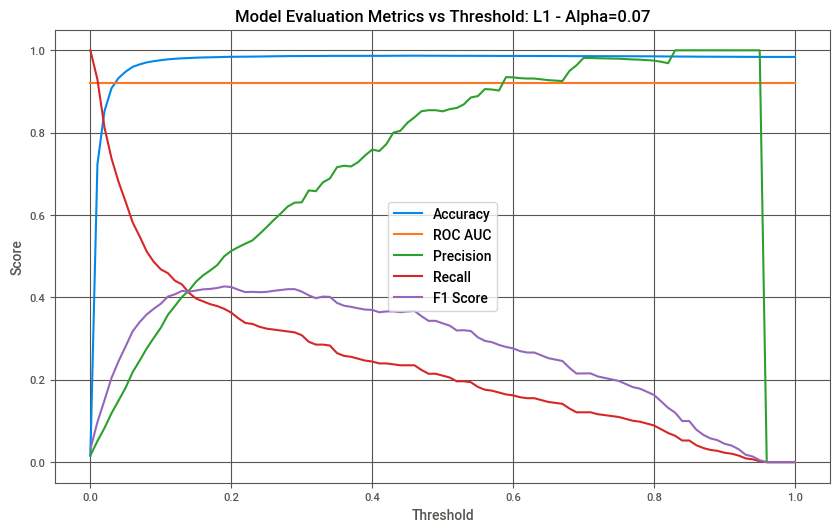

In [115]:
metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.07")

In [116]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "L1 - Alpha=0.07")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

### Distribution Transformations

Getting the ones that are not normal into normal distribution using Johnson transformation

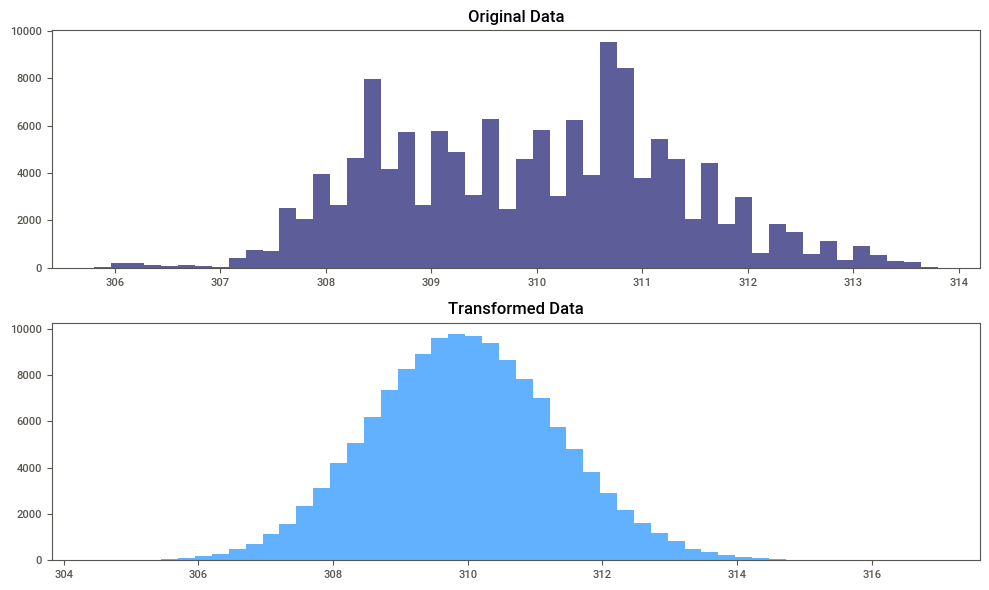

In [117]:
train_data["Process temperature"] = johnson_transformation(train_data["Process temperature"])

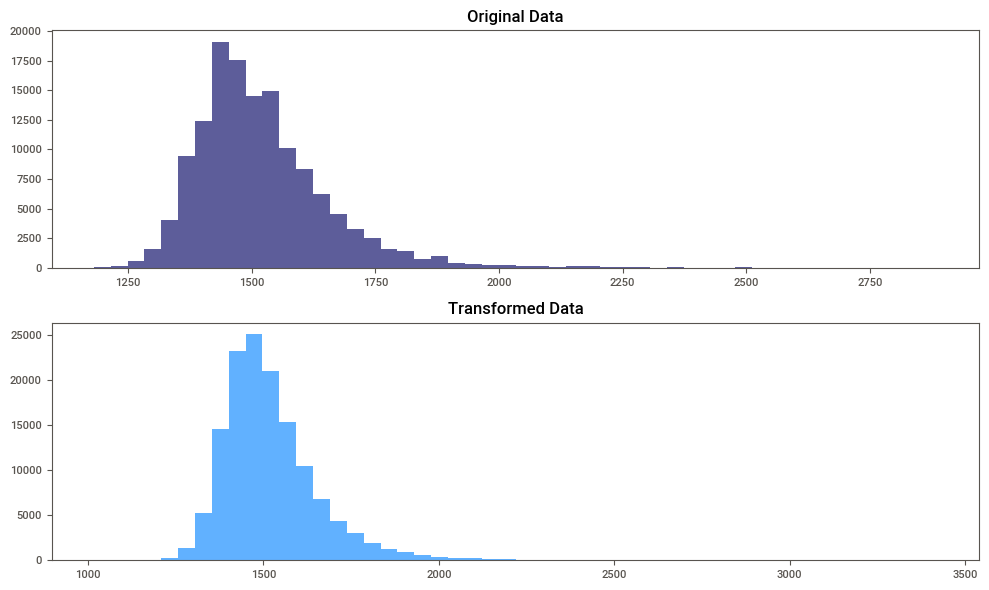

array([1338.36977889, 1398.90165585, 1441.11105522, ..., 1523.64213459,
       1438.76152131, 1547.30987557])

In [118]:
# Just for visualization, I'm not saving the values on the variable
# Rotational Speed is one that won't be transformed because of the context of the problem

johnson_transformation(train_data["Rotational speed"]) 

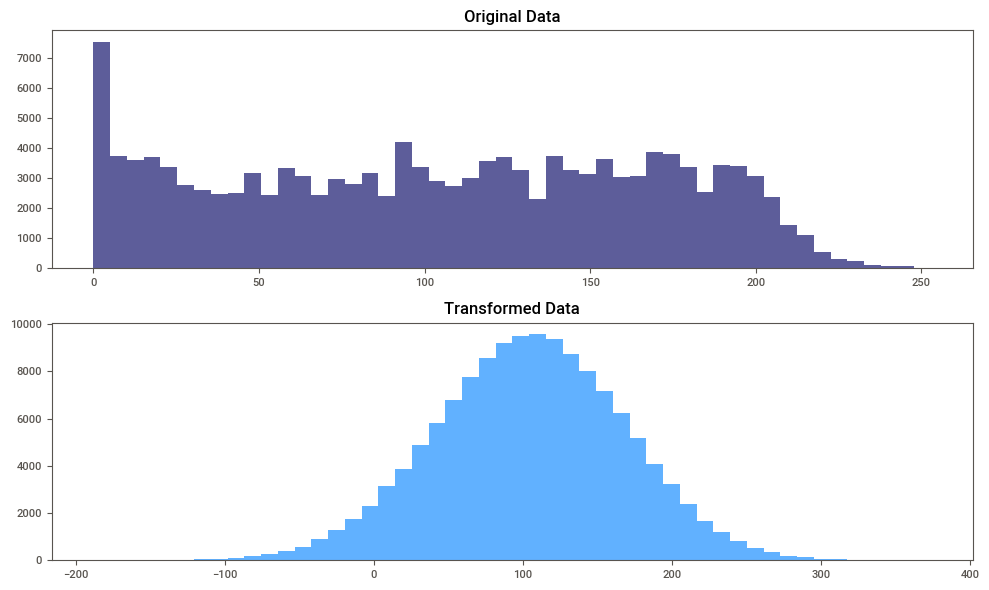

In [119]:
train_data["Tool wear"] = johnson_transformation(train_data["Tool wear"])

# no pasa nada con los que son 0 por desgaste? 
# al normalizar tiene sentido los desgastes negativos? asumimos que si es para el modelo entonces luego funciona?

# Parece con varios picos que podrían transformarse en desgaste leve, medio y alto en vez de hacer una transformación tan agresiva

In [120]:
# Getting the feature changes into X_train
X_train = train_data[list(features)].copy()

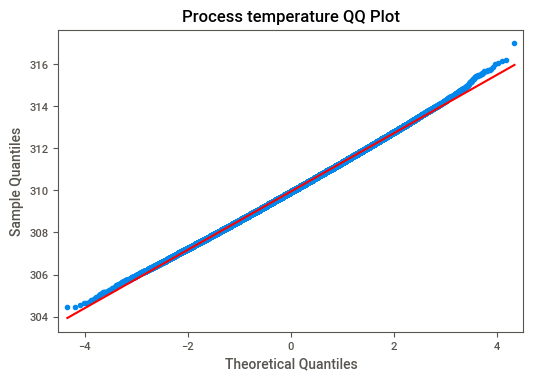

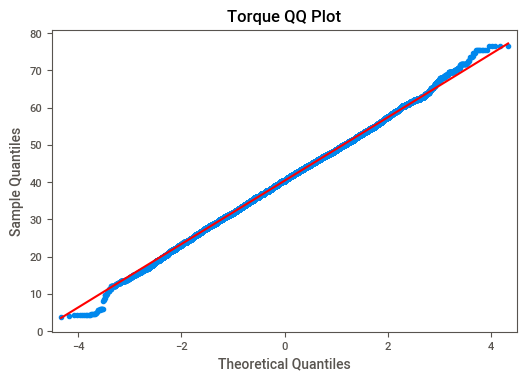

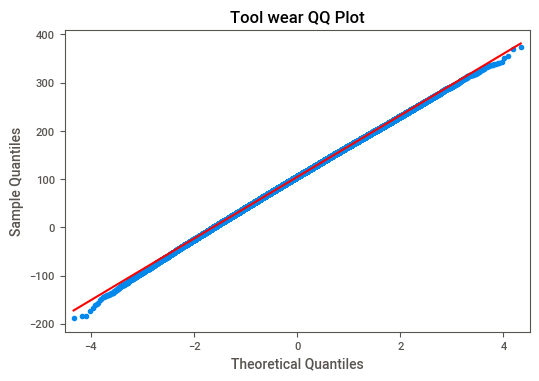

In [121]:
# QQ Plots after transformations

qqColumns = ['Process temperature', 'Torque', 'Tool wear']

for column in qqColumns:
    qqPlot(X_train, column)

### Johnson Transformations | L1 Regularization | Hot Encoding

#### Johnson Transformation & L1 Regularization (alpha = 0.01)

alpha 0.01 -> 3 features selected

In [122]:
# Celer 
!pip install celer

from celer import GroupLasso

In [123]:
# Es un identificador único por lo que no es relevante, se desea generalizar usando el tipo

X_train.drop(columns=['Product ID'], inplace=True) 

In [124]:
X_train_encoded = pd.get_dummies(X_train, columns=['Type']).copy()

In [125]:
# Lasso object

alpha = 0.01
lasso = Lasso(alpha=alpha) 
# 0.00873 3 features

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]

In [126]:
coef

array([ 0.        ,  0.00010244,  0.00329909,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ])

In [127]:
relevant_features

Index(['Rotational speed', 'Torque'], dtype='object')

In [128]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [129]:
newX_train = X_train[relevant_features].copy()
newX_test = X_test[relevant_features].copy()

In [130]:
newX_train

,Rotational speed,Torque
id,,
0,1596,36.1
1,1759,29.1
2,1805,26.5
3,1524,44.3
4,1641,35.4
...,...,...
136424,1530,37.5
136425,1447,49.1
136426,1524,38.5


In [131]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [132]:
params = {"objective": "binary:logistic"} 

In [133]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 33


In [134]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.450743,0.000145,0.827287,0.002734,0.014141,0.000159,0.451000,0.000313,0.823235,0.011223,0.014806,0.000547
1,0.317385,0.000219,0.839173,0.004303,0.014167,0.000164,0.317833,0.000574,0.835196,0.011513,0.014623,0.000667
2,0.234101,0.000286,0.847775,0.010857,0.014084,0.000176,0.234734,0.000769,0.844810,0.003167,0.014572,0.000660
3,0.179067,0.000346,0.861520,0.008225,0.014066,0.000182,0.179903,0.000938,0.856391,0.009765,0.014608,0.000657
4,0.141559,0.000374,0.863286,0.008645,0.014070,0.000183,0.142581,0.001095,0.857549,0.010295,0.014572,0.000643
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.031658,0.000529,0.985383,0.000938,0.010898,0.000119,0.066842,0.002904,0.854640,0.009918,0.015825,0.000530
996,0.031651,0.000529,0.985402,0.000940,0.010898,0.000122,0.066854,0.002902,0.854625,0.009877,0.015825,0.000530
997,0.031647,0.000529,0.985409,0.000939,0.010899,0.000121,0.066865,0.002905,0.854615,0.009890,0.015825,0.000530
998,0.031643,0.000531,0.985414,0.000942,0.010899,0.000121,0.066869,0.002906,0.854607,0.009892,0.015825,0.000530


In [135]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45098
[1]	test-logloss:0.31769
[2]	test-logloss:0.23441
[3]	test-logloss:0.17943
[4]	test-logloss:0.14194
[5]	test-logloss:0.11578
[6]	test-logloss:0.09753
[7]	test-logloss:0.08454
[8]	test-logloss:0.07535
[9]	test-logloss:0.06888
[10]	test-logloss:0.06416
[11]	test-logloss:0.06097
[12]	test-logloss:0.05866
[13]	test-logloss:0.05704
[14]	test-logloss:0.05585
[15]	test-logloss:0.05517
[16]	test-logloss:0.05435
[17]	test-logloss:0.05390
[18]	test-logloss:0.05345
[19]	test-logloss:0.05316
[20]	test-logloss:0.05297
[21]	test-logloss:0.05275
[22]	test-logloss:0.05248
[23]	test-logloss:0.05224
[24]	test-logloss:0.05214
[25]	test-logloss:0.05190
[26]	test-logloss:0.05168
[27]	test-logloss:0.05164
[28]	test-logloss:0.05154
[29]	test-logloss:0.05142
[30]	test-logloss:0.05135
[31]	test-logloss:0.05132
[32]	test-logloss:0.05131


In [136]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)

y_pred_binary = (y_pred > 0.06).astype(int) 

In [137]:
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Final with alpha = 0.01 (2 features) 

Accuracy: 0.9367
ROC AUC: 0.9250
Recall: 0.7078
F1 Score: 0.2641


In [138]:
results = { "Model": "JT | L1 a=0.01",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

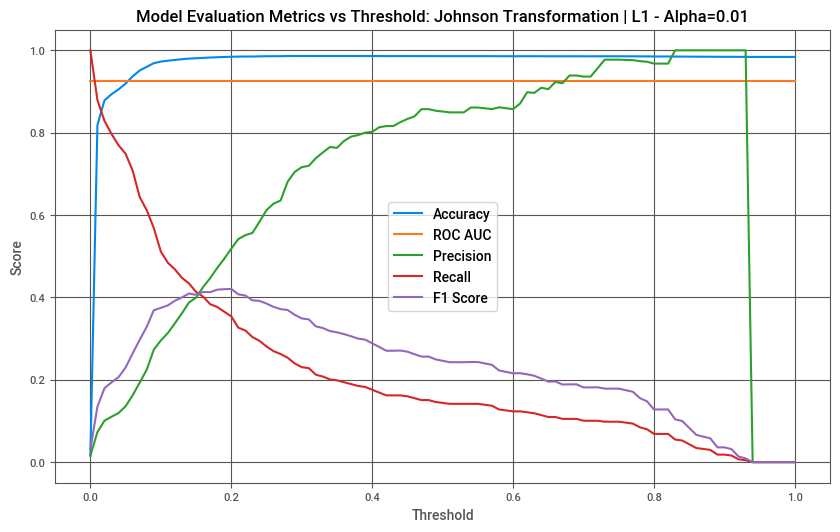

In [139]:
metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.01")

In [140]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.01")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

#### Johnson Transformation & L1 Regularization (alpha = 0.05)

alpha 0.05 -> 2 features selected

In [141]:
# Lasso object
alpha = 0.05
lasso = Lasso(alpha=alpha) # Two features

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]


In [142]:
coef

array([ 0.00000000e+00,  2.98102018e-05,  1.82207890e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [143]:
relevant_features

Index(['Rotational speed', 'Torque'], dtype='object')

In [144]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [145]:
newX_train = X_train[relevant_features].copy()
newX_test = X_test[relevant_features].copy()

In [146]:
newX_train

,Rotational speed,Torque
id,,
0,1596,36.1
1,1759,29.1
2,1805,26.5
3,1524,44.3
4,1641,35.4
...,...,...
136424,1530,37.5
136425,1447,49.1
136426,1524,38.5


In [147]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [148]:
params = {"objective": "binary:logistic"} 

In [149]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)

Best number of boosting rounds: 33


In [150]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.450743,0.000145,0.827287,0.002734,0.014141,0.000159,0.451000,0.000313,0.823235,0.011223,0.014806,0.000547
1,0.317385,0.000219,0.839173,0.004303,0.014167,0.000164,0.317833,0.000574,0.835196,0.011513,0.014623,0.000667
2,0.234101,0.000286,0.847775,0.010857,0.014084,0.000176,0.234734,0.000769,0.844810,0.003167,0.014572,0.000660
3,0.179067,0.000346,0.861520,0.008225,0.014066,0.000182,0.179903,0.000938,0.856391,0.009765,0.014608,0.000657
4,0.141559,0.000374,0.863286,0.008645,0.014070,0.000183,0.142581,0.001095,0.857549,0.010295,0.014572,0.000643
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.031658,0.000529,0.985383,0.000938,0.010898,0.000119,0.066842,0.002904,0.854640,0.009918,0.015825,0.000530
996,0.031651,0.000529,0.985402,0.000940,0.010898,0.000122,0.066854,0.002902,0.854625,0.009877,0.015825,0.000530
997,0.031647,0.000529,0.985409,0.000939,0.010899,0.000121,0.066865,0.002905,0.854615,0.009890,0.015825,0.000530
998,0.031643,0.000531,0.985414,0.000942,0.010899,0.000121,0.066869,0.002906,0.854607,0.009892,0.015825,0.000530


In [151]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45098
[1]	test-logloss:0.31769
[2]	test-logloss:0.23441
[3]	test-logloss:0.17943
[4]	test-logloss:0.14194
[5]	test-logloss:0.11578
[6]	test-logloss:0.09753
[7]	test-logloss:0.08454
[8]	test-logloss:0.07535
[9]	test-logloss:0.06888
[10]	test-logloss:0.06416
[11]	test-logloss:0.06097
[12]	test-logloss:0.05866
[13]	test-logloss:0.05704
[14]	test-logloss:0.05585
[15]	test-logloss:0.05517
[16]	test-logloss:0.05435
[17]	test-logloss:0.05390
[18]	test-logloss:0.05345
[19]	test-logloss:0.05316
[20]	test-logloss:0.05297
[21]	test-logloss:0.05275
[22]	test-logloss:0.05248
[23]	test-logloss:0.05224
[24]	test-logloss:0.05214
[25]	test-logloss:0.05190
[26]	test-logloss:0.05168
[27]	test-logloss:0.05164
[28]	test-logloss:0.05154
[29]	test-logloss:0.05142
[30]	test-logloss:0.05135
[31]	test-logloss:0.05132
[32]	test-logloss:0.05131


In [152]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)
y_pred_binary = (y_pred > 0.06).astype(int) 

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [153]:
print(f"Final with alpha = {alpha}  ({len(list(relevant_features))} features) \n")

print_metrics(y_test, y_pred, y_pred_binary)

Final with alpha = 0.05  (2 features) 

Accuracy: 0.9367
ROC AUC: 0.9250
Precision: 0.1623
Recall: 0.7078
F1 Score: 0.2641


In [154]:
results = { "Model": "JT | L1 a=0.05",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

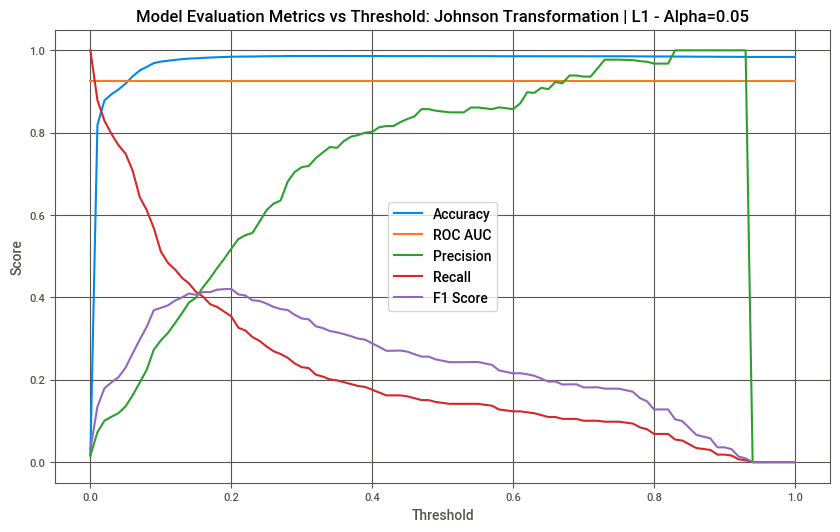

In [155]:
metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.05")

In [156]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.05")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

#### Johnson Transformation & L1 Regularization (alpha = 0.07)

alpha 0.07 -> 1 feature selected

In [157]:
# # Lasso object
# alpha = 0.07
# lasso = Lasso(alpha=alpha) # One feature

# lasso.fit(X_train_encoded, y_train)

# # Model Coefficients
# coef = lasso.coef_

# relevant_features = X_train_encoded.columns[coef != 0]

# coef

# /// 

# relevant_features

# ///

# # XGBoost 

# model = xgb.XGBClassifier(
#     objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
# )

# # mirar que mas se puede ajustar

# ///

# newX_train = X_train[relevant_features].copy()
# newX_test = X_test[relevant_features].copy()

# /// 

# newX_train

# /// 

# dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
# dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

# /// 

# params = {"objective": "binary:logistic"} 

# ///

# results = xgb.cv(
#    params, dtrain_clf,
#    num_boost_round=n,
#    nfold=5,
#    metrics=["logloss", "auc", "error"],
# )

# best_round = results["test-logloss-mean"].idxmin()
# print("Best number of boosting rounds:", best_round)

# ///

# results

# ///

# final_model = xgb.train(
#     params,
#     dtrain_clf,
#     num_boost_round=best_round,
#     evals=[(dtest_clf, "test")],
#     early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
# )

# ///

# dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

# y_pred = final_model.predict(dtest_final)

# y_pred_binary = (y_pred > 0.06).astype(int) 

# ///

# print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")
# print_metrics(y_test, y_pred, y_pred_binary)

# ///

# metrics_vs_threshold_plot(y_test, y_pred)

In [158]:
# Lasso object

alpha = 0.07
lasso = Lasso(alpha=alpha) # One feature

lasso.fit(X_train_encoded, y_train)

# Model Coefficients
coef = lasso.coef_

relevant_features = X_train_encoded.columns[coef != 0]

In [159]:
coef

array([ 0.        ,  0.        ,  0.00116628,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ])

In [160]:
relevant_features

Index(['Torque'], dtype='object')

In [161]:
# XGBoost 

model = xgb.XGBClassifier(
    objective="binary:logistic",  # Utiliza la función de pérdida logística para clasificación binaria
)

# mirar que mas se puede ajustar

In [162]:
# X_test.drop(columns=['Product ID'], inplace=True) 
X_test_encoded = pd.get_dummies(X_test, columns=['Type']).copy()

newX_train = X_train[relevant_features].copy()
newX_test = X_test_encoded[relevant_features].copy()

In [163]:
dtrain_clf = xgb.DMatrix(newX_train, label=y_train, enable_categorical=True) #dtrain es para varios "formatos"
dtest_clf = xgb.DMatrix(newX_test, label=y_test, enable_categorical=True) 

In [164]:
params = {"objective": "binary:logistic"} 

In [165]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["logloss", "auc", "error"],
)

best_round = results["test-logloss-mean"].idxmin()
print("Best number of boosting rounds:", best_round)


Best number of boosting rounds: 24


In [166]:
results

,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.451160,0.000146,0.827928,0.003019,0.014350,0.000155,0.451259,0.000315,0.825633,0.012017,0.014557,0.000595
1,0.318127,0.000238,0.832312,0.003445,0.014361,0.000158,0.318300,0.000561,0.830220,0.011150,0.014528,0.000566
2,0.235199,0.000303,0.832910,0.003055,0.014363,0.000156,0.235467,0.000768,0.831214,0.011669,0.014513,0.000550
3,0.180560,0.000344,0.833054,0.003053,0.014370,0.000163,0.180911,0.000957,0.831292,0.011761,0.014440,0.000635
4,0.143489,0.000380,0.833219,0.002998,0.014370,0.000163,0.143921,0.001127,0.831263,0.011781,0.014469,0.000581
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.058914,0.000531,0.873907,0.001799,0.014266,0.000156,0.064050,0.002352,0.836005,0.007607,0.014674,0.000652
996,0.058914,0.000531,0.873907,0.001798,0.014266,0.000156,0.064050,0.002352,0.836004,0.007604,0.014674,0.000652
997,0.058914,0.000531,0.873908,0.001797,0.014266,0.000156,0.064052,0.002352,0.836003,0.007598,0.014674,0.000652
998,0.058914,0.000531,0.873908,0.001798,0.014266,0.000156,0.064053,0.002352,0.836000,0.007598,0.014674,0.000652


In [167]:
final_model = xgb.train(
    params,
    dtrain_clf,
    num_boost_round=best_round,
    evals=[(dtest_clf, "test")],
    early_stopping_rounds=10,  # Optional: Perform early stopping to prevent overfitting
)

[0]	test-logloss:0.45133
[1]	test-logloss:0.31839
[2]	test-logloss:0.23552
[3]	test-logloss:0.18090
[4]	test-logloss:0.14380
[5]	test-logloss:0.11821
[6]	test-logloss:0.10039
[7]	test-logloss:0.08797
[8]	test-logloss:0.07931
[9]	test-logloss:0.07329
[10]	test-logloss:0.06909
[11]	test-logloss:0.06622
[12]	test-logloss:0.06426
[13]	test-logloss:0.06294
[14]	test-logloss:0.06205
[15]	test-logloss:0.06143
[16]	test-logloss:0.06106
[17]	test-logloss:0.06083
[18]	test-logloss:0.06065
[19]	test-logloss:0.06049
[20]	test-logloss:0.06040
[21]	test-logloss:0.06033
[22]	test-logloss:0.06023
[23]	test-logloss:0.06017


In [168]:
dtest_final = xgb.DMatrix(newX_test, enable_categorical=True)

y_pred = final_model.predict(dtest_final)
y_pred_binary = (y_pred > 0.06).astype(int) 

In [169]:
print(f"Final with alpha = {alpha} ({len(list(relevant_features))} features) \n")

print_metrics(y_test, y_pred, y_pred_binary)

Final with alpha = 0.07 (1 features) 



Accuracy: 0.9526
ROC AUC: 0.8710
Precision: 0.1630
Recall: 0.4726
F1 Score: 0.2424


In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [170]:
results = { "Model": "JT | L1 a=0.07",
            "Accuracy" : accuracy, 
            "Roc_Auc":roc_auc, 
            "Precision":precision,
            "Recall":recall,
            "F1":f1}

resultList.append(results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

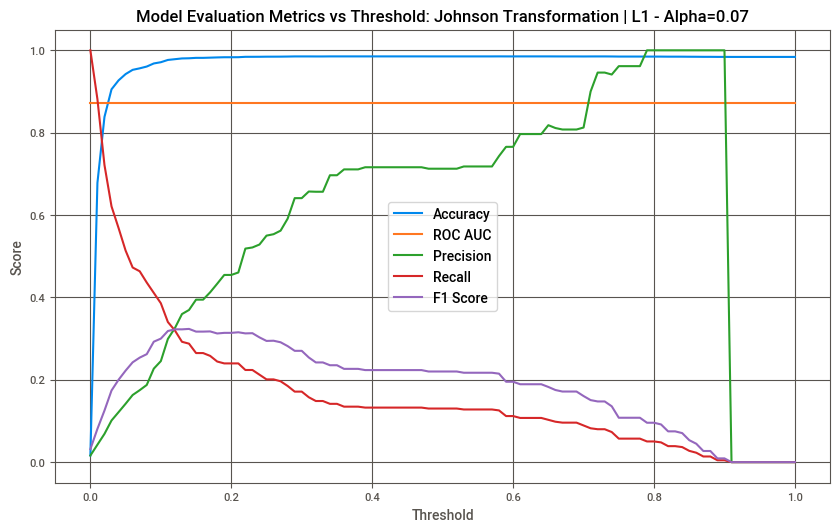

In [171]:
metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.07")

In [172]:
interactive_metrics_vs_threshold_plot(y_test, y_pred, "Johnson Transformation | L1 - Alpha=0.07")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-def

### Results Visualization

In [280]:
recallResults = []
modelNames = []

for i in range(len(resultList)):
    recallResults.append(resultList[i]["Recall"])
    modelNames.append(resultList[i]["Model"])

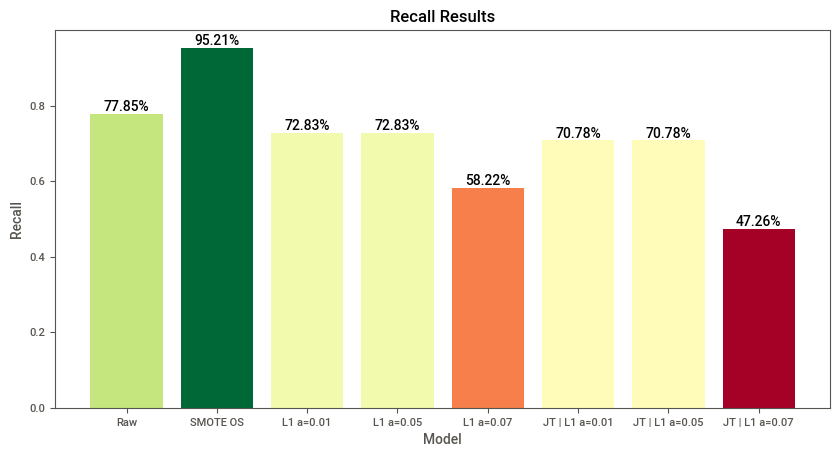

In [281]:
# Colormap from red to green
cmap = plt.get_cmap("RdYlGn")

# Normalize recall values -> colormap
normalize = plt.Normalize(min(recallResults), max(recallResults))

# Color map that maps low values to red and high values to green
colors = [cmap(normalize(value)) for value in recallResults]

plt.figure(figsize=(10, 5))

for i in range(len(recallResults)):
    plt.text(i, recallResults[i], f"{recallResults[i]*100:.2f}%", ha='center', va='bottom')

bars = plt.bar(modelNames, recallResults, color=colors)
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall Results")

plt.show()


In [282]:
sortIndices = np.argsort(recallResults)

sortedModelNames = np.take(modelNames, sortIndices)
sortedRecallResults = np.take(recallResults, sortIndices)

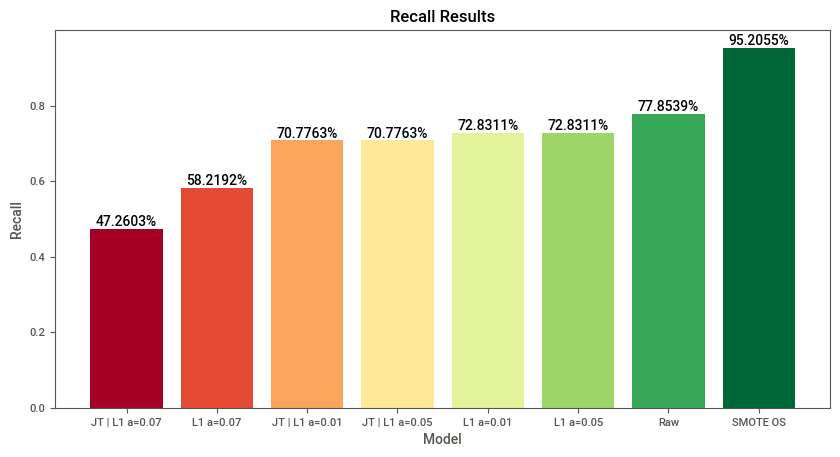

In [283]:
plt.figure(figsize=(10, 5))

colors = plt.cm.RdYlGn(np.linspace(0, 1, len(sortedRecallResults)))

for i in range(len(recallResults)):
    plt.text(i, sortedRecallResults[i], f"{sortedRecallResults[i]*100:.4f}%", ha = 'center', va='bottom')

plt.bar(sortedModelNames, sortedRecallResults, color=colors)
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall Results")
plt.show()

In [284]:
# Plotting without 0.05 because of same recall value with 0.01
# Identified cause: When L1 regularization is done, the 0.05 should have 2 features, but it is getting 3

# boolean indexing to delete entries
deleteIndices = np.logical_or(sortedModelNames == 'JT | L1 a=0.05', sortedModelNames == 'L1 a=0.05')

print("Delete Indices:", deleteIndices)

# Without 0.05 -> ~ bracket -> (not) bracket
sortedRecallResultsWo05 = sortedRecallResults[~deleteIndices]
sortedModelNamesWo05 = sortedModelNames[~deleteIndices]

Delete Indices: [False False False  True False  True False False]


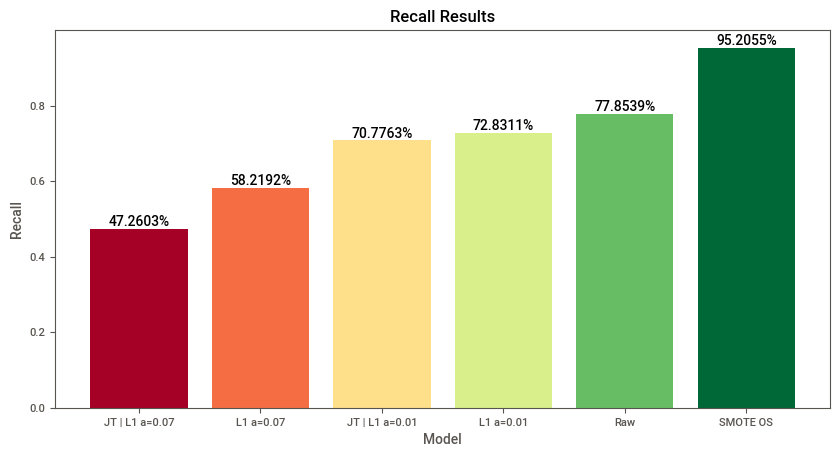

In [285]:
# Create a color gradient from red to blue
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(sortedRecallResultsWo05)))

plt.figure(figsize=(10, 5))

for i in range(len(sortedRecallResultsWo05)):
    plt.text(i, sortedRecallResultsWo05[i], f"{sortedRecallResultsWo05[i]*100:.4f}%", ha='center', va='bottom')

# Use the defined colors for the bars
bars = plt.bar(sortedModelNamesWo05, sortedRecallResultsWo05, color=colors)
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall Results")

plt.show()

In [287]:
data = {'Model': sortedModelNamesWo05, 'Recall': sortedRecallResultsWo05*100}

fig = px.bar(data, x='Model', y='Recall', text='Recall', color='Recall', color_continuous_scale=["firebrick", "khaki", "seagreen"])

fig.update_traces(texttemplate='%{text:.4f}%', textposition='outside')
fig.update_layout(
    title='Recall Results',
    xaxis_title='Model',
    yaxis_title='Recall',
    xaxis=dict(type='category'),
    height=500,
    width=800
)
fig.show()